# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [4]:
for col in app_train:
    if app_train[col].dtype == 'object':
        print("----------")
        print("candidates: {}".format(col))
        print(app_train[col].unique())
        if len(list(app_train[col].unique())) <= 2:
            print(app_train[col].value_counts())

----------
candidates: NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
----------
candidates: CODE_GENDER
['M' 'F' 'XNA']
----------
candidates: FLAG_OWN_CAR
['N' 'Y']
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
----------
candidates: FLAG_OWN_REALTY
['Y' 'N']
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
----------
candidates: NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
----------
candidates: NAME_INCOME_TYPE
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
----------
candidates: NAME_EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
----------
candidates: NAME_FAMILY_STATUS
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknow

In [5]:
# CODE_GENDER 和 EMERGENCYSTATE_MODE 其實都是只有兩種值的類別型欄位，但因為有缺值，造成if condition在判斷的時候被排除在外。

In [6]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
app_train_col = []
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
            app_train_col.append(col)
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train[['DAYS_EMPLOYED', 'DAYS_EMPLOYED_ANOM']]

,DAYS_EMPLOYED,DAYS_EMPLOYED_ANOM
0,-637,False
1,-1188,False
2,-225,False
3,-3039,False
4,-3038,False
5,-1588,False
6,-3130,False
7,-449,False
8,365243,True
9,-2019,False


In [10]:
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [11]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH']/365
app_train['YEARS_BIRTH_BINNED'] = pd.cut(app_train['YEARS_BIRTH'], np.linspace(20, 70, 11))

In [12]:
app_train['YEARS_BIRTH_BINNED'].value_counts().sort_index()

(20.0, 25.0]    12159
(25.0, 30.0]    32862
(30.0, 35.0]    39440
(35.0, 40.0]    42868
(40.0, 45.0]    41406
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(60.0, 65.0]    27476
(65.0, 70.0]     8103
Name: YEARS_BIRTH_BINNED, dtype: int64

In [13]:
YEARS_grp = app_train.groupby('YEARS_BIRTH_BINNED').mean()
YEARS_grp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,YEARS_BIRTH
YEARS_BIRTH_BINNED,,,,,,,,,,,,,,,,,,,,,
"(20.0, 25.0]",277358.960688,0.123036,0.262604,0.318283,0.631795,0.214327,145349.196965,414914.548853,21679.641635,374891.145507,...,0.000329,0.005264,0.008974,0.006816,0.033738,0.157674,0.270249,1.545723,0.002796,23.377522
"(25.0, 30.0]",277837.106628,0.111436,0.107084,0.382265,0.602215,0.527113,164764.078910,506670.477634,25847.846211,456469.012189,...,0.000974,0.000791,0.007455,0.007822,0.033713,0.223540,0.258134,1.793353,0.003104,27.822518
"(30.0, 35.0]",277962.566709,0.102814,0.098301,0.409432,0.629919,0.815923,178096.685310,571973.248251,27401.403241,513821.389447,...,0.000634,0.000051,0.006208,0.007782,0.034801,0.288408,0.252849,1.783060,0.004031,32.479037
"(35.0, 40.0]",278149.565527,0.089414,0.095269,0.405734,0.660726,0.846552,179617.542456,627017.073050,28277.648436,564062.701464,...,0.000537,0.000140,0.006155,0.007000,0.033892,0.279646,0.264087,1.828213,0.008001,37.555913
"(40.0, 45.0]",278885.543375,0.078491,0.095349,0.392093,0.684635,0.584625,181633.860249,648860.277931,28762.835656,583035.478547,...,0.000797,0.000072,0.006013,0.006176,0.034210,0.295187,0.260435,1.880468,0.015408,42.459346


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

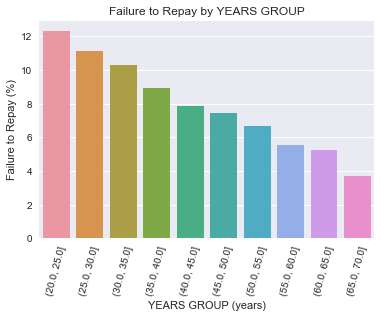

In [14]:
sns.barplot(YEARS_grp.index.astype('str'), YEARS_grp['TARGET'] * 100)
plt.title('Failure to Repay by YEARS GROUP'); plt.xlabel('YEARS GROUP (years)'); plt.ylabel('Failure to Repay (%)')
plt.xticks(rotation=75)

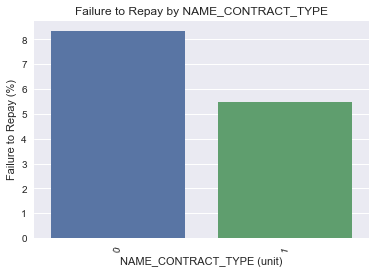

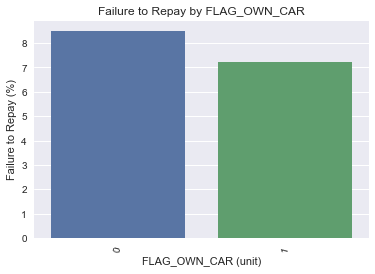

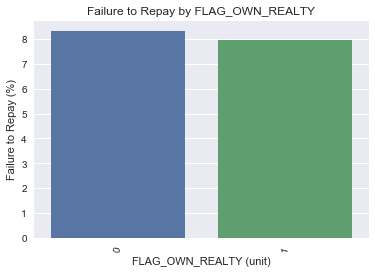

In [15]:
# 只有兩種值的類別型欄位
for col in app_train_col:
    grp = app_train.groupby(col).mean()
    sns.barplot(grp.index.astype('str'), grp['TARGET'] * 100)
    plt.title('Failure to Repay by {}'.format(col)); plt.xlabel('{} (unit)'.format(col)); plt.ylabel('Failure to Repay (%)')
    plt.xticks(rotation=75)
    plt.show()

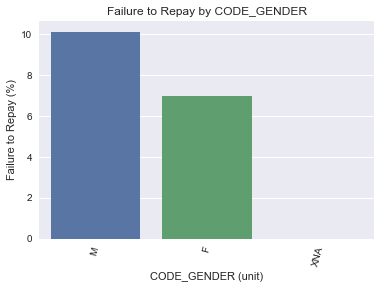

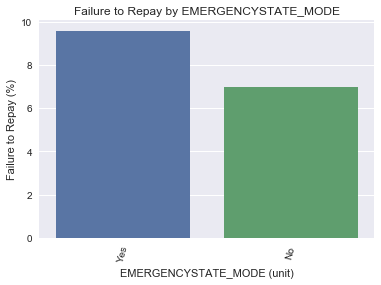

In [16]:
# CODE_GENDER 和 EMERGENCYSTATE_MODE 應該也是只有兩種值的類別型欄位
for col in ['CODE_GENDER', 'EMERGENCYSTATE_MODE']:
    grp = app_train.groupby(col).mean().sort_values(by="TARGET", ascending=False)
    sns.barplot(grp.index.astype('str'), grp['TARGET'] * 100)
    plt.title('Failure to Repay by {}'.format(col)); plt.xlabel('{} (unit)'.format(col)); plt.ylabel('Failure to Repay (%)')
    plt.xticks(rotation=75)
    plt.show()

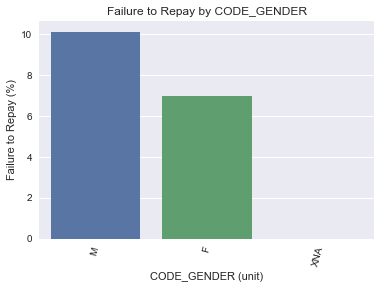

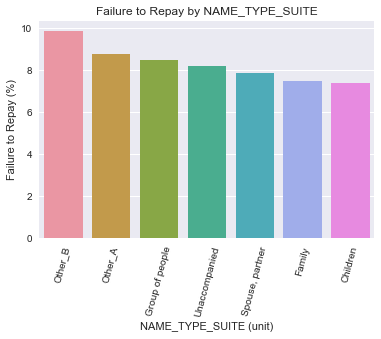

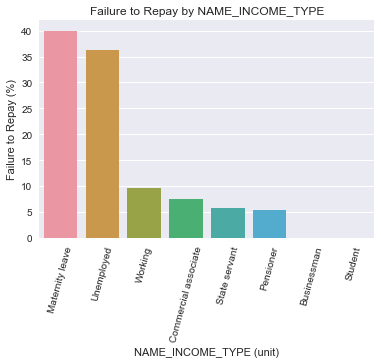

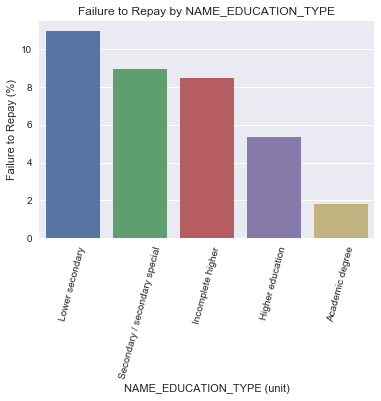

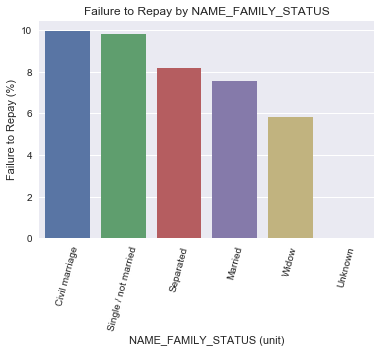

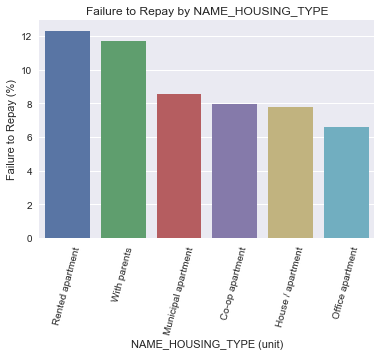

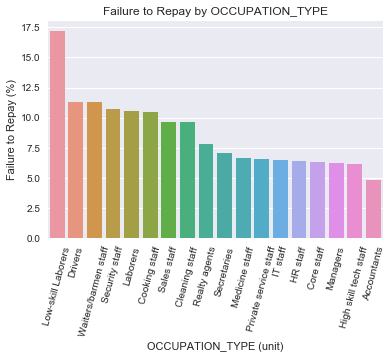

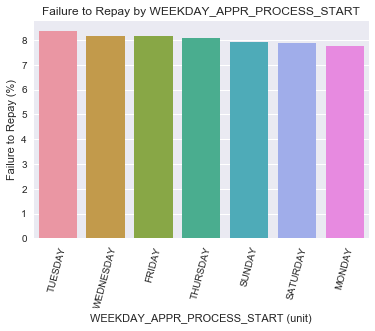

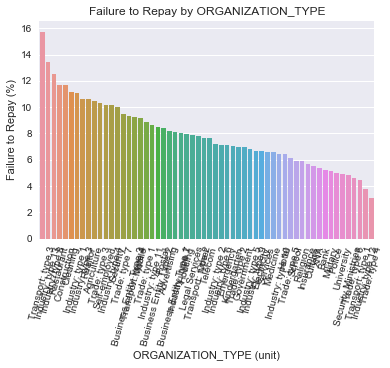

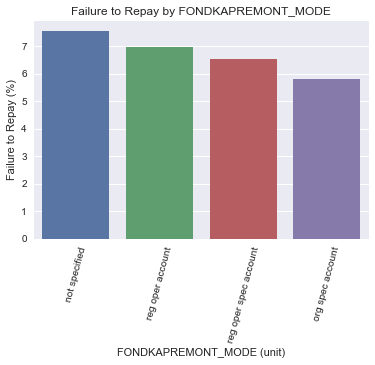

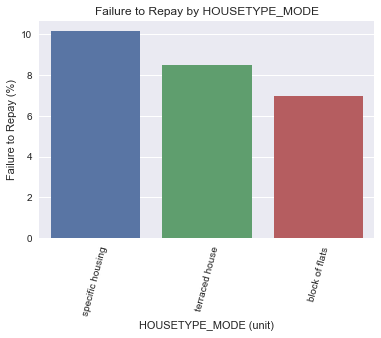

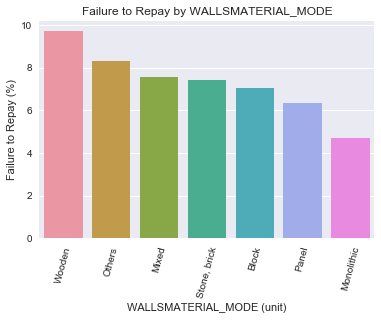

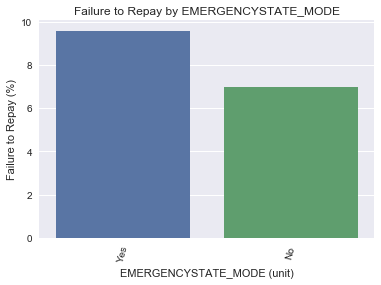

In [17]:
# 其餘類別型欄位
app_train_col_2 = [n for n in app_train if app_train[n].dtype == 'object']
for col in app_train_col_2:
    grp = app_train.groupby(col).mean().sort_values(by="TARGET", ascending=False)
    sns.barplot(grp.index.astype('str'), grp['TARGET'] * 100)
    plt.title('Failure to Repay by {}'.format(col)); plt.xlabel('{} (unit)'.format(col)); plt.ylabel('Failure to Repay (%)')
    plt.xticks(rotation=75)
    plt.show()

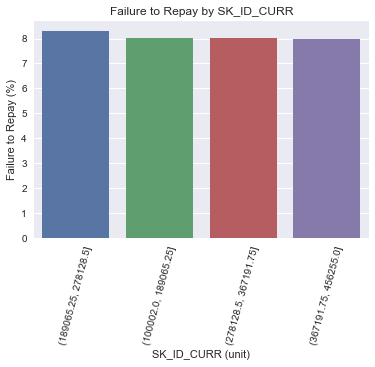

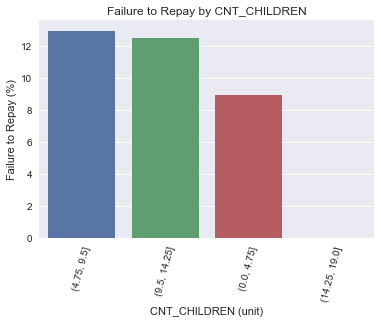

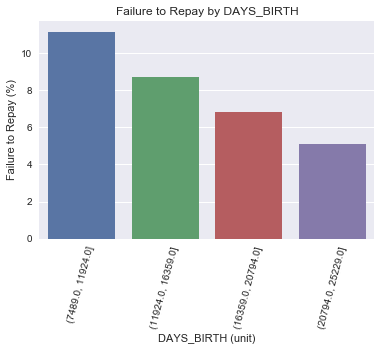

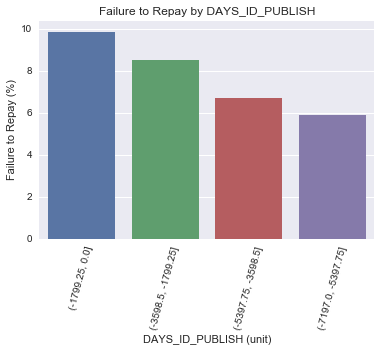

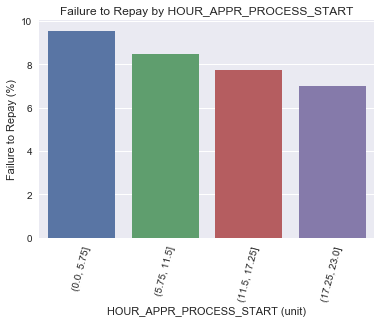

In [18]:
for col in app_train:
    if app_train[col].dtype == 'int64':
        if len(list(app_train[col].unique())) > 5:
            app_train[col+'BINNED'] = pd.cut(app_train[col], np.linspace(min(app_train[col]), max(app_train[col]), 5))
            grp = app_train.groupby(col+'BINNED').mean().sort_values(by="TARGET", ascending=False)
            sns.barplot(grp.index.astype('str'), grp['TARGET'] * 100)
            plt.title('Failure to Repay by {}'.format(col)); plt.xlabel('{} (unit)'.format(col)); plt.ylabel('Failure to Repay (%)')
            plt.xticks(rotation=75)
            plt.show()